<a href="https://colab.research.google.com/github/alyssakatelyn/ftw-day2-ML/blob/master/Predicting_Bank_Run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
data = pd.read_csv('bank_churn_modelling.csv')

In [0]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
data.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [0]:
features = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
X = data[features]

In [0]:
X_temp = data [features]
X = pd.get_dummies(X_temp)

In [0]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [0]:
y = data['Exited']
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc = logreg.score(X_test, y_test)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg.coef_

array([[-4.23151660e-03,  3.08400105e-02, -2.11214457e-03,
         4.18437785e-06, -4.01415048e-04, -2.29031888e-04,
        -1.26064667e-03, -1.43166758e-06, -7.06120323e-04,
         8.05544107e-04, -2.90974554e-04,  6.78923185e-04,
        -8.70473955e-04]])

In [0]:
acc

0.7985

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      3190
           1       0.53      0.04      0.07       810

    accuracy                           0.80      4000
   macro avg       0.67      0.52      0.48      4000
weighted avg       0.75      0.80      0.72      4000



In [0]:
confusion_matrix(y_test, y_pred)

array([[3162,   28],
       [ 778,   32]])

In [0]:
# balance data
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
y_train.value_counts()

0    4773
1    1227
Name: Exited, dtype: int64

In [0]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
np.bincount(y_train)

array([4773, 4773])

In [0]:
# run regression again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc = logreg.score(X_test, y_test)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg.coef_

array([[-4.13362770e-03,  6.54931343e-02, -3.19232634e-02,
         4.42328223e-06, -8.10719865e-03, -3.82627135e-03,
        -2.41816041e-02, -1.21440976e-06, -1.28237978e-02,
         1.28387864e-02, -3.99595168e-03,  1.12915022e-02,
        -1.52724653e-02]])

In [0]:
acc

0.65725

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      3190
           1       0.33      0.67      0.44       810

    accuracy                           0.66      4000
   macro avg       0.61      0.66      0.60      4000
weighted avg       0.77      0.66      0.69      4000



In [0]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[2089, 1101],
       [ 270,  540]])

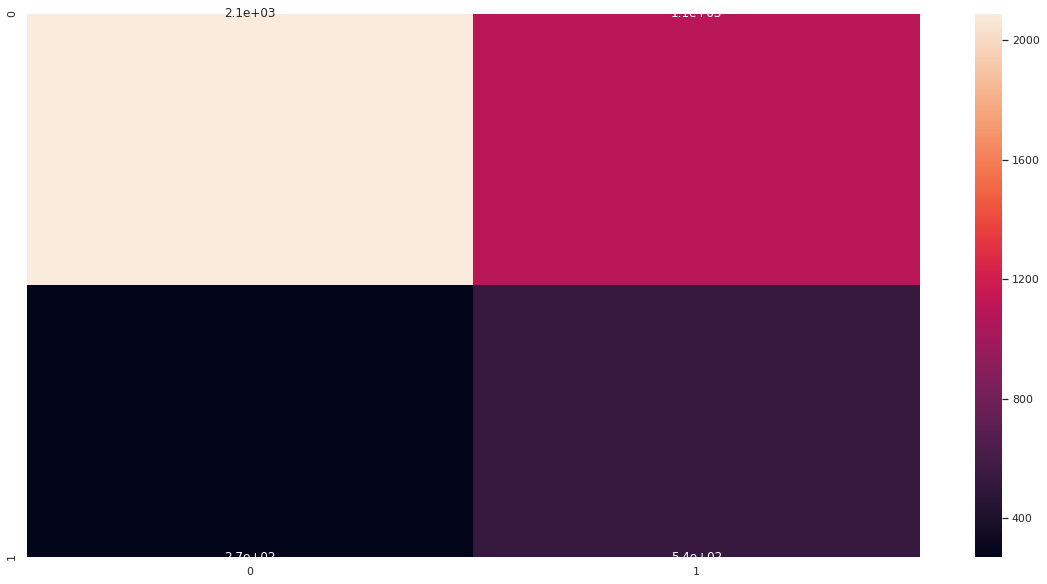

In [0]:
sns.heatmap(cf, annot = True)

In [0]:

test_data = X_test
test_data['predictions'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
test_data[test_data['predictions']==0].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,predictions
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.0
mean,678.832556,33.575668,5.330649,63391.054900,1.584570,0.707503,0.494277,101417.547533,0.542603,0.203900,0.253497,0.448919,0.551081,0.0
std,87.799971,6.216897,2.845774,62021.062128,0.549839,0.455006,0.500073,57170.854384,0.498287,0.402981,0.435105,0.497489,0.497489,0.0
min,412.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,618.500000,29.000000,3.000000,0.000000,1.000000,0.000000,0.000000,52554.305000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,680.000000,33.000000,6.000000,75150.340000,2.000000,1.000000,0.000000,102930.460000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,741.000000,38.000000,8.000000,119063.910000,2.000000,1.000000,1.000000,149438.570000,1.000000,0.000000,1.000000,1.000000,1.000000,0.0
max,850.000000,55.000000,10.000000,212778.200000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [0]:
test_data[test_data['predictions']==1].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,predictions
count,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.0
mean,602.678854,46.858013,4.703230,97215.895814,1.475929,0.702011,0.533821,94138.400481,0.436929,0.340037,0.223035,0.482023,0.517977,1.0
std,91.800751,10.628881,2.907357,56760.925392,0.631152,0.457514,0.499007,56938.905638,0.496157,0.473866,0.416408,0.499829,0.499829,0.0
min,350.000000,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,536.000000,39.000000,2.000000,72309.300000,1.000000,0.000000,0.000000,46044.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,601.000000,45.000000,5.000000,113781.500000,1.000000,1.000000,1.000000,88965.460000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,668.000000,53.000000,7.000000,136281.410000,2.000000,1.000000,1.000000,140881.200000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199929.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [0]:
feature_importance = pd.DataFrame({'Features': pd.Series(X.columns),
                                    'Feature Importance': pd.Series(logreg.coef_[0])})
feature_importance.sort_values('Feature Importance', ascending=False)

,Features,Feature Importance
1,Age,0.065493
9,Geography_Germany,0.012839
11,Gender_Female,0.011292
3,Balance,0.000004
7,EstimatedSalary,-0.000001
5,HasCrCard,-0.003826
10,Geography_Spain,-0.003996
0,CreditScore,-0.004134
4,NumOfProducts,-0.008107
8,Geography_France,-0.012824


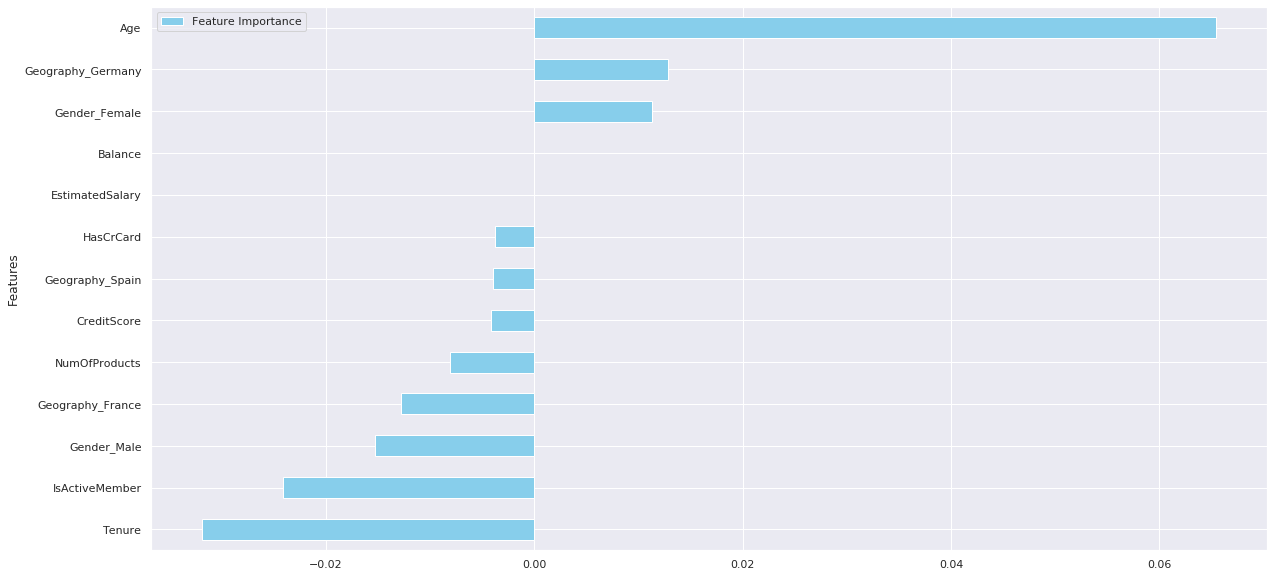

In [0]:
feature_importance.sort_values('Feature Importance').set_index('Features').plot(kind = 'barh', color = 'skyblue')

In [0]:

g = sns.catplot(x="Geography", hue="Gender", col="Exited",
...                 data=data, kind="count",
...                 height=4, aspect=.7);


SyntaxError: ignored

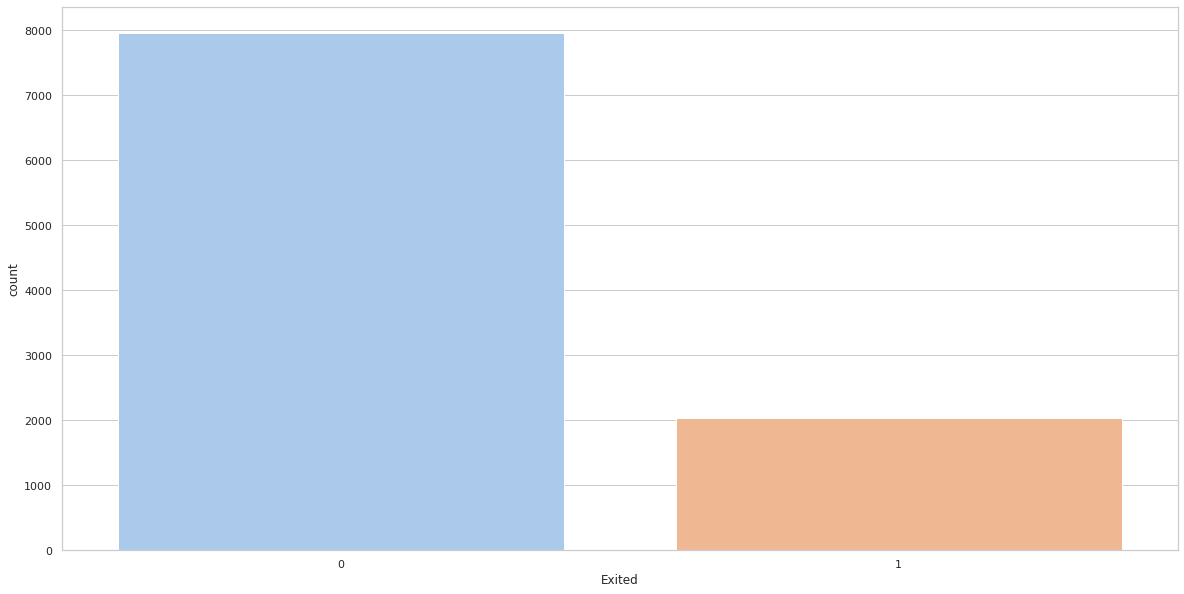

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data,palette="pastel")

Text(0, 0.5, 'Exited')

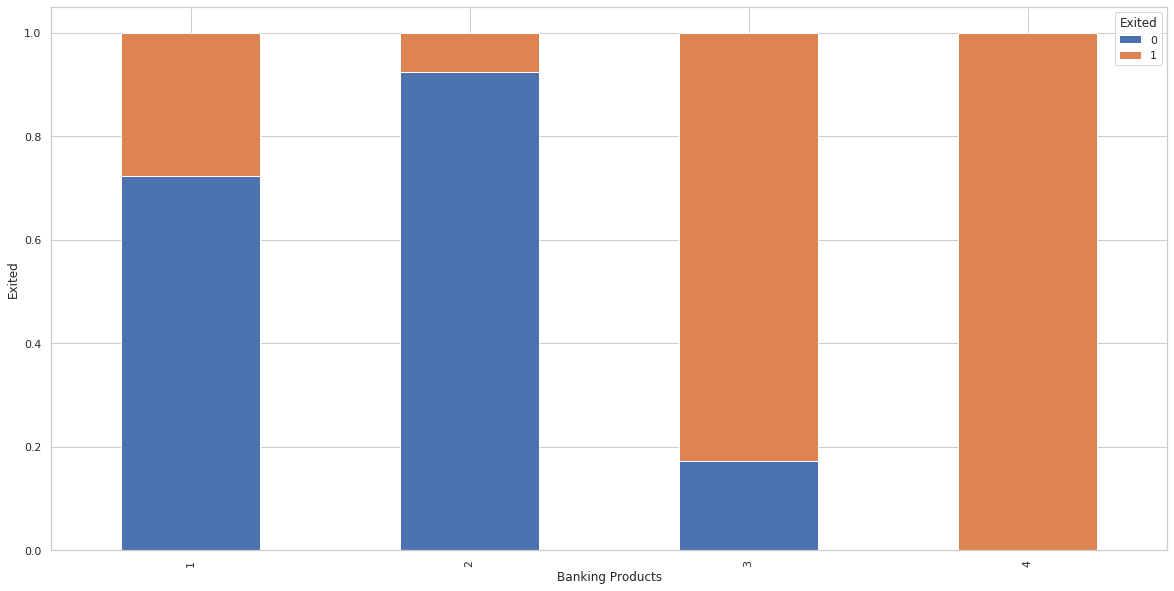

In [0]:
table=pd.crosstab(data.NumOfProducts,data.Exited)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Banking Products')
plt.ylabel('Exited')

In [0]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

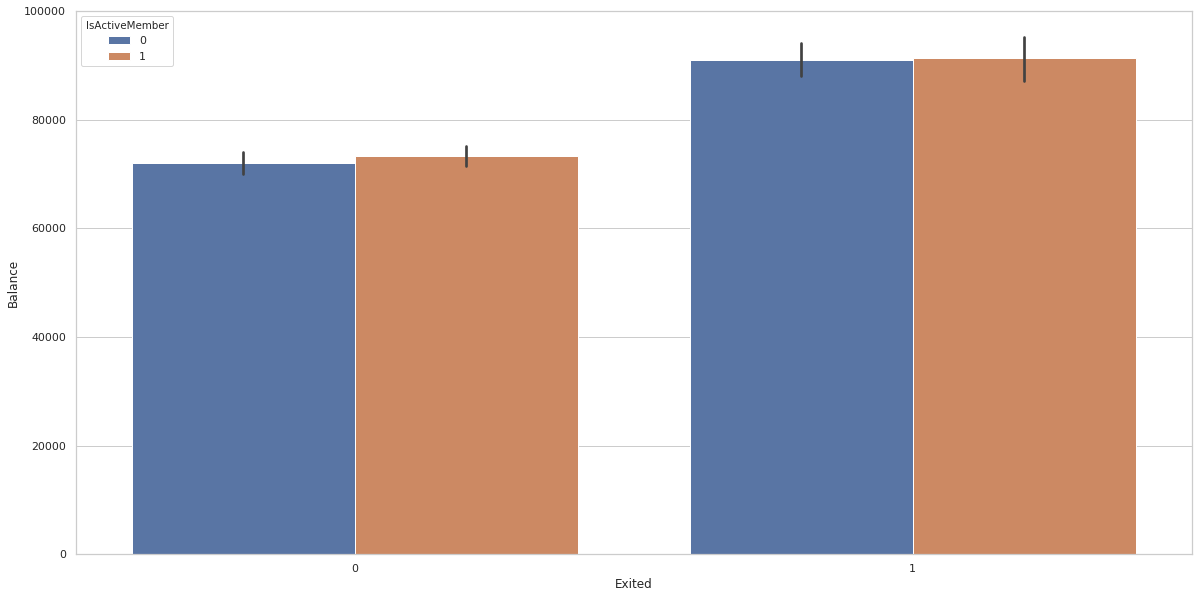

In [0]:
sns.barplot(x="Exited", y="Balance", hue="IsActiveMember", data=data)

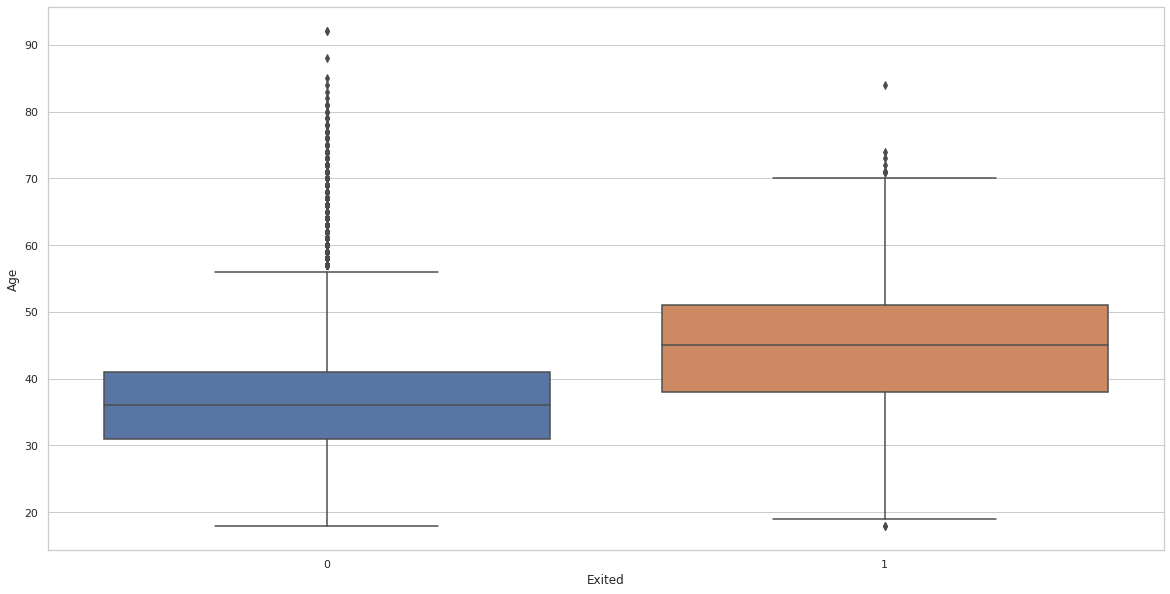

In [0]:
ax = sns.boxplot(x="Exited", y="Age", data=data)